In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
#from modularity_maximization.utils import get_modularity

In [ ]:
#creation des matrices
community = np.zeros((80,80),dtype='float')
friend = np.zeros((80,80),dtype='float')

In [ ]:
#remplir les matrices a partir 
fichier_community = open("/content/drive/MyDrive/PCD/community.txt", "r")
fichier_friend = open("/content/drive/MyDrive/PCD/friend.txt", "r")
lines_community = fichier_community.readlines()
lines_friend = fichier_friend.readlines()
fichier_community.close()

for line in lines_community:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  community[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  community[(int(l[1])-1)][(int(l[0])-1)]=float(l[2]) 
for line in lines_friend:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  friend[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  friend[(int(l[1])-1)][(int(l[0])-1)]=float(l[2])  

In [ ]:
#trouver les positions des lignes nulles
f=friend
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [ ]:
print(l2)

[0, 3, 4, 12, 13, 18, 25, 28, 34, 39, 47, 48, 49, 56, 60, 63, 64, 65, 72, 78, 79]


In [ ]:
#suppression des lignes nulles
for i in range(len(l2)):
  friend=(np.delete(friend, (l2[i]-i), axis=0))
  friend=(np.delete(friend, (l2[i]-i), axis=1))

In [ ]:
friend.shape

(59, 59)

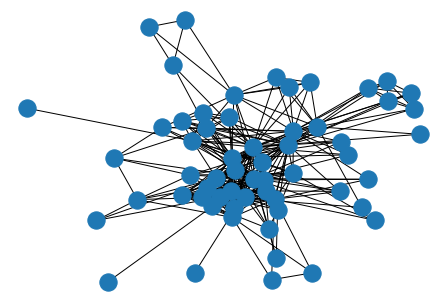

In [ ]:
g_x= nx.DiGraph(friend)
w_friend=g_x.to_undirected()
nx.draw(w_friend)
plt.show()

In [ ]:
#trouver les positions des lignes nulles
f=community
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [ ]:
print(l2)

[0, 16, 18, 25, 34, 38, 39, 40, 41, 49, 56, 63, 64, 72, 78]


In [ ]:
#suppression des lignes nulles
for i in range(len(l2)):
  community=(np.delete(community, (l2[i]-i), axis=0))
  community=(np.delete(community, (l2[i]-i), axis=1))

In [ ]:
#suppression des autres lignes non nuls pour arriver a une dimension 59*59
for i in range(6):
  community=(np.delete(community, (0), axis=0))
  community=(np.delete(community, (0), axis=1))

In [ ]:
community.shape

(59, 59)

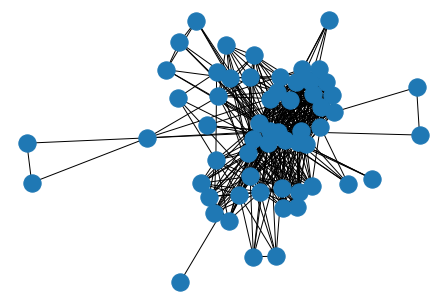

In [ ]:
g_x= nx.DiGraph(community)
w_community=g_x.to_undirected()
nx.draw(w_community)
plt.show()

In [ ]:
B_community=np.sum(community,axis=0)
l_community=B_community.tolist()
B_friend=np.sum(friend,axis=0)
l_friend=B_friend.tolist()

In [ ]:
#trouver les i_leader
i_leader_community=l_community.index(max(l_community))
i_leader_friend=l_friend.index(max(l_friend))

In [ ]:
#friend modifié
l3=list(range(59))
i_leader=i_leader_friend
A=friend
o_friend=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_friend.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  #print(time.time()-t2)
o_friend.append(i_leader)  
print(l3)
print(len(o_friend)) 
print(o_friend) 

43
[]
59
[43, 2, 16, 10, 11, 6, 57, 5, 17, 4, 19, 18, 29, 49, 27, 45, 46, 21, 52, 47, 9, 39, 55, 58, 25, 30, 42, 20, 24, 35, 54, 0, 36, 41, 33, 7, 12, 22, 26, 31, 23, 48, 40, 50, 56, 13, 1, 44, 38, 28, 37, 14, 51, 32, 15, 34, 53, 8, 3]


In [ ]:
#community modifié
l3=list(range(59))
i_leader=i_leader_community
A=community
o_community=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_community.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  #print(time.time()-t2)
o_community.append(i_leader)  
print(l3)
print(len(o_community)) 
print(o_community) 

40
[]
59
[40, 29, 26, 24, 3, 11, 15, 20, 51, 27, 34, 50, 21, 14, 25, 42, 47, 56, 28, 53, 35, 19, 30, 31, 38, 13, 52, 49, 55, 48, 33, 45, 43, 18, 9, 6, 8, 44, 36, 54, 32, 22, 5, 10, 23, 39, 0, 58, 46, 57, 1, 2, 37, 16, 7, 17, 41, 4, 12]


In [ ]:
#les matrices modifiées(dima kamel el 5edma b he4om)
C_community = np.zeros((59,59),dtype='float')
C_friend = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_community[i][j]=community[o_community[i]][o_community[j]]
    C_friend[i][j]=friend[o_friend[i]][o_friend[j]]

In [ ]:
score_2 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(C_community)
    score_2.append(kmeans.inertia_)

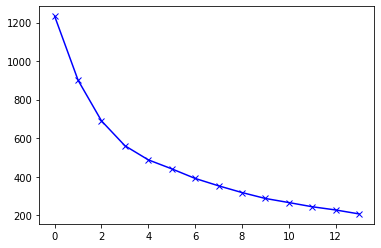

In [ ]:
plt.plot(score_2, 'bx-')

In [ ]:

score_3 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(C_friend)
    score_3.append(kmeans.inertia_)

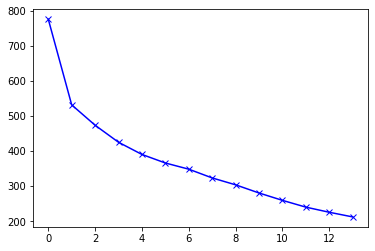

In [ ]:
plt.plot(score_3, 'bx-')

In [ ]:
df_C_community = pd.DataFrame(C_community)
df_C_friend = pd.DataFrame(C_friend)

In [ ]:
#kmeans community
import sklearn
kmeans = KMeans(12)
kmeans.fit(C_community)
labels_community = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(C_community, labels_community)
Davies_M= sklearn.metrics.davies_bouldin_score(C_community, labels_community)
Calinski_Harabaz=metrics.calinski_harabasz_score(C_community, labels_community)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

17.214041039150388
0.9624403980033999
0.27630949597403215


In [ ]:
#kmeans friend
kmeans = KMeans(12)
kmeans.fit(C_friend)
labels_friend = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(C_friend, labels_friend)
Davies_M= sklearn.metrics.davies_bouldin_score(C_friend, labels_friend)
Calinski_Harabaz=metrics.calinski_harabasz_score(C_friend, labels_friend)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)
#dict={}
#for i in range(59):
  #dict[i]=labels_friend[i]
#print(get_modularity(w_friend, dict)

9.229956974903182
1.1489037325301552
0.15932096400103635


In [ ]:
M = np.zeros((59,59),dtype='float')

In [ ]:
k=0
for i in range(58):
  for j in range(i+1,59):
    if(labels_friend[i]==labels_friend[j]):
      k+=1
    if(labels_community[i]==labels_community[j]):
      k+=1          
    M[i][j]=k
    M[j][i]=k
    k=0

In [ ]:
B_M=np.sum(M,axis=0)
l_M=B_M.tolist()


In [ ]:
#trouver les i_leader
i_leader_M=l_M.index(max(l_M))


In [ ]:
#M modifié
l3=list(range(59))
i_leader=i_leader_M
A=M
o_M=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_M.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  #print(time.time()-t2)
o_M.append(i_leader)  
#print(l3)
print(len(o_M)) 
print(o_M) 

29
59
[29, 30, 40, 41, 16, 14, 19, 15, 17, 20, 18, 28, 21, 22, 23, 42, 7, 8, 9, 10, 11, 12, 13, 2, 3, 4, 5, 6, 58, 51, 52, 50, 0, 57, 1, 55, 56, 53, 43, 54, 44, 45, 27, 24, 25, 26, 48, 49, 31, 32, 33, 34, 46, 35, 36, 37, 38, 39, 47]


In [ ]:
#les matrices modifiées(dima kamel el 5edma b he4om)
C_M = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_M[i][j]=M[o_M[i]][o_M[j]]
   

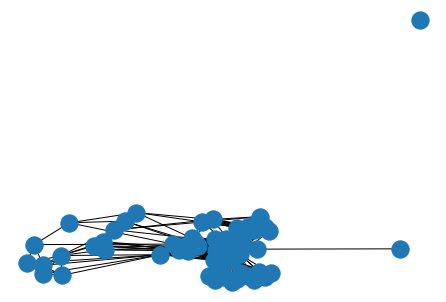

In [ ]:
g_x= nx.DiGraph(M)
w_M=g_x.to_undirected()
nx.draw(w_M)
plt.show()

In [ ]:
score_4 = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(C_M)
    score_4.append(kmeans.inertia_)

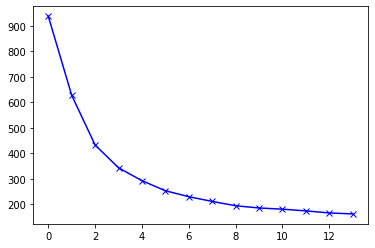

In [ ]:
plt.plot(score_4, 'bx-')

In [ ]:
df_M = pd.DataFrame(C_M)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(C_M)

In [ ]:
#kmeans M
import sklearn
kmeans = KMeans(3)
kmeans.fit(C_M)
labels = kmeans.labels_
#metrics
silhouette_avg = silhouette_score(C_M, labels)
Davies_M= sklearn.metrics.davies_bouldin_score(C_M, labels)
Calinski_Harabaz=metrics.calinski_harabasz_score(C_M, labels)  
print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

32.75333390158345
1.1128184154497933
0.36135873733552804


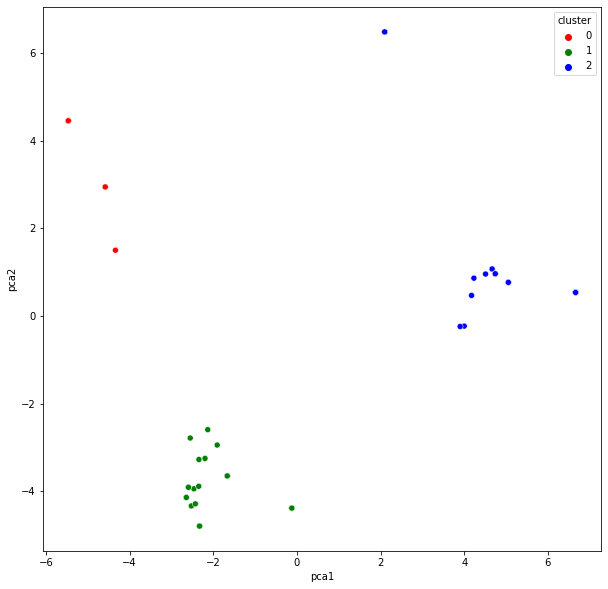

In [ ]:
# network
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(data_scaled)
pca_df= pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df,palette = ['red','green','blue'])
#palette = ['red','green','blue','pink','brown','yellow']